In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Define the chunk size
chunk_size = 100000

# Initialize an empty list to store the sample
sample_list = []

# Read the CSV in chunks without early termination
for chunk in pd.read_csv('/content/drive/MyDrive/CSCE580_Project/Files/final_dataset.csv', chunksize=chunk_size):
    # Sample from the current chunk
    sample = chunk.sample(frac=0.1, random_state=42)
    sample_list.append(sample)

# Concatenate all sampled chunks
df = pd.concat(sample_list, ignore_index=True)
print(df['Label'].value_counts())

Label
ddos      647297
Benign    632166
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279463 entries, 0 to 1279462
Data columns (total 85 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1279463 non-null  int64  
 1   Flow ID            1279463 non-null  object 
 2   Src IP             1279463 non-null  object 
 3   Src Port           1279463 non-null  int64  
 4   Dst IP             1279463 non-null  object 
 5   Dst Port           1279463 non-null  int64  
 6   Protocol           1279463 non-null  int64  
 7   Timestamp          1279463 non-null  object 
 8   Flow Duration      1279463 non-null  int64  
 9   Tot Fwd Pkts       1279463 non-null  int64  
 10  Tot Bwd Pkts       1279463 non-null  int64  
 11  TotLen Fwd Pkts    1279463 non-null  float64
 12  TotLen Bwd Pkts    1279463 non-null  float64
 13  Fwd Pkt Len Max    1279463 non-null  float64
 14  Fwd Pkt Len Min    1279463 non-null  float64
 15  Fwd Pkt Len Mean   1279463 non-n

In [ ]:
df['Label'].value_counts()

,count
Label,
ddos,647297
Benign,632166


In [ ]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22165,172.31.69.25-18.219.211.138-80-34408-6,18.219.211.138,34408,172.31.69.25,80,6,15/02/2018 07:24:59 PM,5032233,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,26628,172.31.69.25-18.219.211.138-80-40676-6,18.219.211.138,40676,172.31.69.25,80,6,15/02/2018 07:26:24 PM,10993127,3,...,0,783.0,0.0,783.0,783.0,5990709.0,0.0,5990709.0,5990709.0,ddos
2,76682,192.168.2.109-203.73.24.75-4020-80-6,192.168.2.109,4020,203.73.24.75,80,6,12/06/2010 03:12:15 PM,479425,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,23143,172.31.69.25-18.219.211.138-80-36102-6,18.219.211.138,36102,172.31.69.25,80,6,15/02/2018 07:08:53 PM,9042123,1,...,0,0.0,0.0,0.0,0.0,9042123.0,0.0,9042123.0,9042123.0,ddos
4,39435,172.31.69.25-18.219.211.138-80-44284-6,18.219.211.138,44284,172.31.69.25,80,6,15/02/2018 07:19:56 PM,1907579,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [ ]:
# Save the sampled dataframe to a new CSV
df.head().to_csv('/content/drive/MyDrive/CSCE580_Project/Files/sampled_head.csv', index=False)

In [ ]:
columns_list = [
    "Flow ID", "Src IP", "Src Port", "Dst IP", "Dst Port", "Protocol", "Timestamp", "Flow Duration", "Tot Fwd Pkts", "Tot Bwd Pkts",
    "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Fwd Pkt Len Max", "Fwd Pkt Len Min", "Fwd Pkt Len Mean", "Fwd Pkt Len Std",
    "Bwd Pkt Len Max", "Bwd Pkt Len Min", "Bwd Pkt Len Mean", "Bwd Pkt Len Std", "Flow Byts/s", "Flow Pkts/s", "Flow IAT Mean",
    "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Tot", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min",
    "Bwd IAT Tot", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags",
    "Bwd URG Flags", "Fwd Header Len", "Bwd Header Len", "Fwd Pkts/s", "Bwd Pkts/s", "Pkt Len Min", "Pkt Len Max", "Pkt Len Mean",
    "Pkt Len Std", "Pkt Len Var", "FIN Flag Cnt", "SYN Flag Cnt", "RST Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "URG Flag Cnt",
    "CWE Flag Count", "ECE Flag Cnt", "Down/Up Ratio", "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Fwd Byts/b Avg",
    "Fwd Pkts/b Avg", "Fwd Blk Rate Avg", "Bwd Byts/b Avg", "Bwd Pkts/b Avg", "Bwd Blk Rate Avg", "Subflow Fwd Pkts",
    "Subflow Fwd Byts", "Subflow Bwd Pkts", "Subflow Bwd Byts", "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Act Data Pkts",
    "Fwd Seg Size Min", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"]

we will be leaving all columns, except for the following list due to hardware contraints:
- Timestamp
- Fwd Pkt Len Std
- Bwd Pkt Len Std
- Flow IAT Std
- Fwd IAT Std
- Bwd IAT Std
- Pkt Len Std
- Pkt Len Var
- Down/Up Ratio
- Active Std
- Idle Std


In [ ]:
to_remove = {
    "Timestamp",
    "Fwd Pkt Len Std",
    "Bwd Pkt Len Std",
    "Flow IAT Std",
    "Fwd IAT Std",
    "Bwd IAT Std",
    "Pkt Len Std",
    "Pkt Len Var",
    "Down/Up Ratio",
    "Active Std",
    "Idle Std"

}

#Level 1: Ambiguous / Redundant
to_remove_level1 = {
    "Pkt Len Std", "Pkt Len Var"
}

#Level 2: High-cost (std/var, inter-arrival stats, active/idle distributions)
to_remove_level2 = {
    "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow IAT Std", "Fwd IAT Std", "Bwd IAT Std",
    "Active Mean", "Active Std", "Active Max", "Active Min",
    "Idle Mean", "Idle Std", "Idle Max", "Idle Min"
}

#Level 3: Derived features (ratios, averages, rates — better offline)
to_remove_level3 = {
    "Down/Up Ratio", "Pkt Size Avg",
    "Flow Byts/s", "Flow Pkts/s",
    "Fwd Pkts/s", "Bwd Pkts/s"
}

#Level 4: Structural / transport-specific (heavier to compute in dataplane)
to_remove_level4 = {
    "Subflow Fwd Pkts", "Subflow Fwd Byts",
    "Subflow Bwd Pkts", "Subflow Bwd Byts",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Fwd Seg Size Min",
    "Fwd Header Len", "Bwd Header Len"
}


#Level 5: Irrelevant (low utility, ambiguous, redundant with other signals)
to_remove_level5 = {
    "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
    "PSH Flag Cnt", "URG Flag Cnt",
    "CWE Flag Count", "ECE Flag Cnt",
    "Down/Up Ratio",
    "Fwd Byts/b Avg", "Fwd Pkts/b Avg", "Fwd Blk Rate Avg",
    "Bwd Byts/b Avg", "Bwd Pkts/b Avg", "Bwd Blk Rate Avg",
    "Fwd Act Data Pkts",
    "Active Mean", "Active Std", "Active Max", "Active Min",
    "Idle Mean", "Idle Std", "Idle Max", "Idle Min"
}

to_remove = to_remove | to_remove_level1 | to_remove_level2 | to_remove_level3 | to_remove_level4 | to_remove_level5
new_columns = [col for col in columns_list if col not in to_remove]
print(new_columns)
print("we now have the first 6 columns for 5-tuple and", len(new_columns)-7, " columns for features and a column for lable")

['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Label']
we now have the first 6 columns for 5-tuple and 29  columns for features and a column for lable


In [ ]:
df_filtered = df[new_columns]

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279463 entries, 0 to 1279462
Data columns (total 36 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Flow ID           1279463 non-null  object 
 1   Src IP            1279463 non-null  object 
 2   Src Port          1279463 non-null  int64  
 3   Dst IP            1279463 non-null  object 
 4   Dst Port          1279463 non-null  int64  
 5   Protocol          1279463 non-null  int64  
 6   Flow Duration     1279463 non-null  int64  
 7   Tot Fwd Pkts      1279463 non-null  int64  
 8   Tot Bwd Pkts      1279463 non-null  int64  
 9   TotLen Fwd Pkts   1279463 non-null  float64
 10  TotLen Bwd Pkts   1279463 non-null  float64
 11  Fwd Pkt Len Max   1279463 non-null  float64
 12  Fwd Pkt Len Min   1279463 non-null  float64
 13  Fwd Pkt Len Mean  1279463 non-null  float64
 14  Bwd Pkt Len Max   1279463 non-null  float64
 15  Bwd Pkt Len Min   1279463 non-null  float64
 16  

In [ ]:
df_filtered.shape


(1279463, 36)

In [ ]:
df_filtered.describe(include='all')


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,...,Bwd IAT Max,Bwd IAT Min,Pkt Len Min,Pkt Len Max,Pkt Len Mean,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Label
count,1279463,1279463,1.279463e+06,1279463,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,...,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1.279463e+06,1279463
unique,799309,17916,NaN,17235,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,8.0.6.4-8.6.0.1-0-0-0,172.31.69.25,NaN,172.31.69.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddos
freq,7359,176739,NaN,248466,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647297
mean,NaN,NaN,3.708127e+04,NaN,1.463824e+04,7.828970e+00,8.213385e+06,2.749072e+01,4.727698e+00,1.142314e+03,...,2.626681e+06,2.169928e+05,7.158929e+00,4.328391e+02,7.827662e+01,1.537520e-02,1.359625e-01,1.112013e-01,5.108088e-01,NaN
std,NaN,NaN,2.521760e+04,NaN,2.306352e+04,4.205032e+00,2.475444e+07,1.741564e+03,1.058534e+02,5.574567e+04,...,9.564306e+06,3.360262e+06,1.752415e+01,5.147660e+02,9.413529e+01,1.230399e-01,3.427489e-01,3.143814e-01,4.998834e-01,NaN
min,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,4.430000e+02,NaN,8.000000e+01,6.000000e+00,1.263000e+03,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,5.059600e+04,NaN,8.000000e+01,6.000000e+00,3.217100e+04,2.000000e+00,1.000000e+00,4.200000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+02,5.450000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN
75%,NaN,NaN,5.622200e+04,NaN,3.851000e+04,6.000000e+00,4.156602e+06,4.000000e+00,4.000000e+00,9.350000e+02,...,9.690820e+05,3.280000e+02,0.000000e+00,9.350000e+02,1.432222e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN


Data Preparation

In [ ]:
df = df_filtered

In [ ]:
styled_df = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_df

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Max,Bwd IAT Min,Pkt Len Min,Pkt Len Max,Pkt Len Mean,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt
mean,37081.266681,14638.242458,7.828970,8213385.375572,27.490721,4.727698,1142.314171,2719.337494,292.346538,7.096866,76.238549,301.476446,16.954976,91.918457,1855813.340451,4347199.511690,1445042.915771,7135717.201336,1908309.870164,3360392.808750,1458204.485457,5811047.265772,842838.592717,2626681.117033,216992.831384,7.158929,432.839129,78.276619,0.015375,0.135963,0.111201,0.510809
std,25217.602217,23063.516684,4.205032,24754440.702548,1741.563659,105.853364,55745.670576,152641.167058,392.714051,19.933689,94.314955,442.432940,42.544194,140.848852,8877253.516847,13040123.769240,8782772.806517,24462072.570797,8974341.607896,12348888.840190,8810019.231644,21399866.256902,4036726.830740,9564306.247390,3360262.306273,17.524150,514.765995,94.135292,0.123040,0.342749,0.314381,0.499883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,443.000000,80.000000,6.000000,1263.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,946.166667,1054.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50596.000000,80.000000,6.000000,32171.000000,2.000000,1.000000,42.000000,113.000000,40.000000,0.000000,36.000000,100.000000,0.000000,68.000000,18997.000000,30122.000000,47.000000,1272.000000,457.500000,1021.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,54.500000,0.000000,0.000000,0.000000,1.000000
75%,56222.000000,38510.000000,6.000000,4156602.500000,4.000000,4.000000,935.000000,358.000000,677.000000,0.000000,142.000000,350.000000,0.000000,114.000000,506941.142857,3885094.000000,1968.000000,141677.000000,51664.333333,105110.000000,90.000000,1917732.000000,385102.583350,969082.000000,328.000000,0.000000,935.000000,143.222222,0.000000,0.000000,0.000000,1.000000
max,65535.000000,65534.000000,17.000000,119999996.000000,309628.000000,21676.000000,9908096.000000,31142967.000000,23360.000000,1472.000000,4262.882353,7300.000000,2065.000000,2185.130435,119988724.000000,119999735.000000,119988724.000000,120000000.000000,119988724.000000,119999869.000000,119988724.000000,119999907.000000,119911492.000000,119911492.000000,119911492.000000,1296.000000,23360.000000,1930.967742,1.000000,1.000000,1.000000,1.000000


In [ ]:
num_cols =  df.select_dtypes(exclude=['object']).columns
fwd_cols = [col for col in num_cols if 'Fwd' in col]
bwd_cols = [col for col in num_cols if 'Bwd' in col]

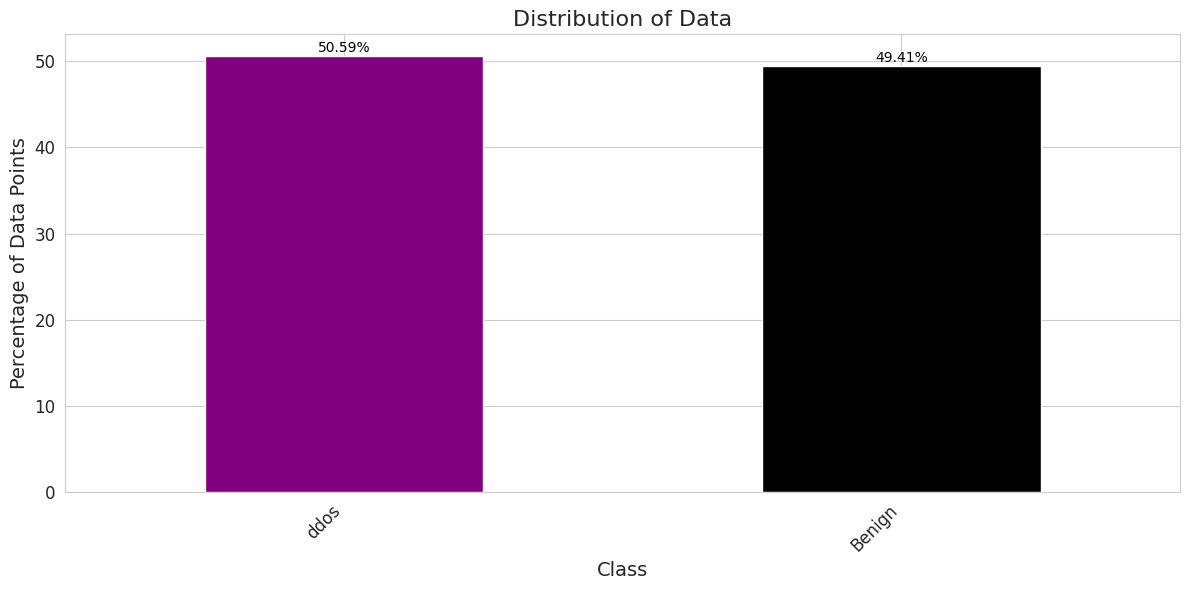

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Set seaborn style

class_distribution = df['Label'].value_counts(normalize=True) * 100  # Calculate percentages
colors = ['purple', 'black']  # List of colors for bars

barplot = class_distribution.plot(kind='bar', color=colors)

plt.xlabel('Class', fontsize=14)
plt.ylabel('Percentage of Data Points', fontsize=14)
plt.title('Distribution of Data', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add percentage labels on top of each bar
for i, value in enumerate(class_distribution):
    barplot.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
from tqdm import tqdm
from IPython.display import display
import gc
import seaborn as sns
import matplotlib.pyplot as plt

def getCorrelatedFeatures(corr):
    correlatedFeatures = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > 0.95:
                print(corr.columns[i],corr.iloc[i,j])
                correlatedFeatures.add(corr.columns[i])
    return correlatedFeatures

<Axes: >

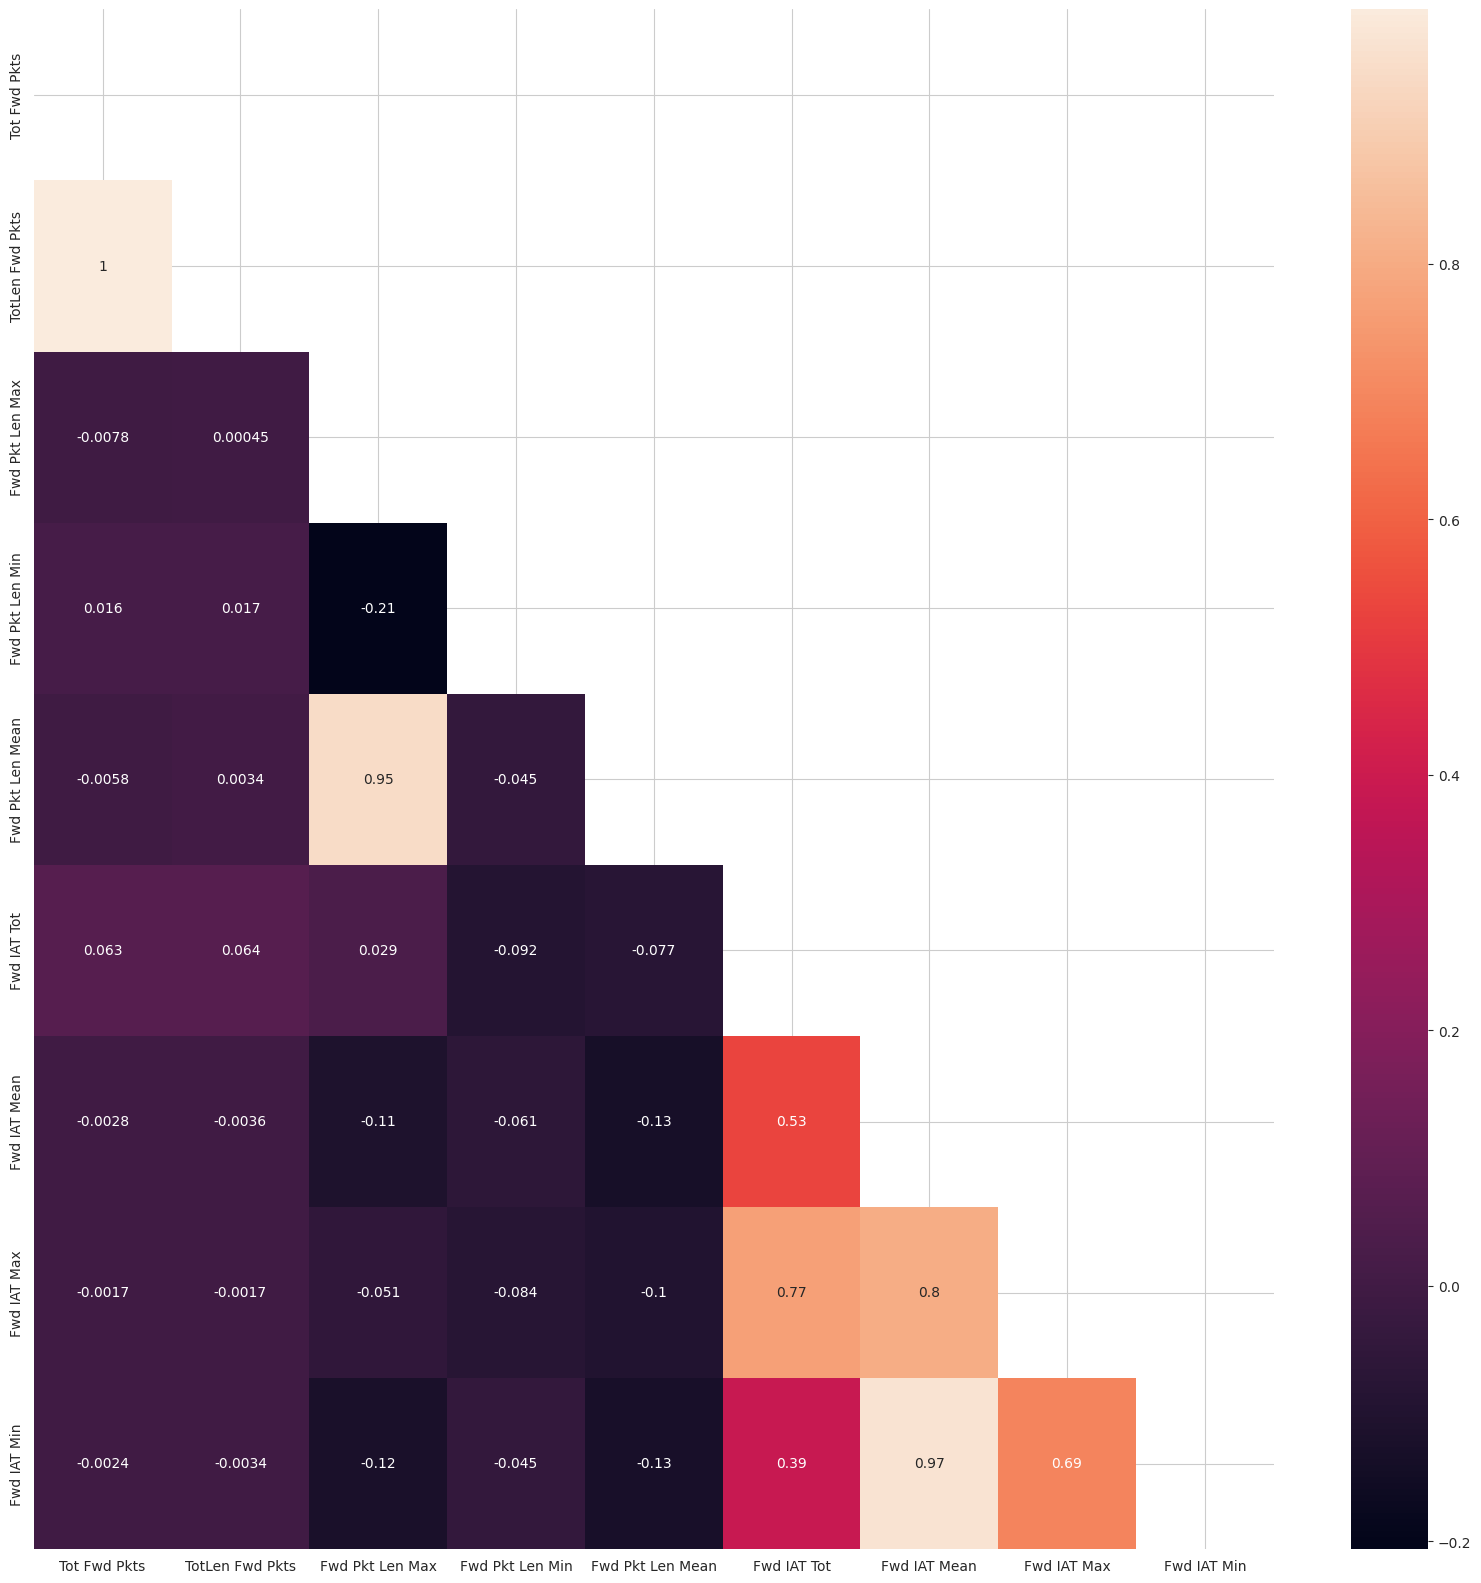

In [ ]:
corr = df[fwd_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, mask=mask)

In [ ]:
correlatedFeatures = set()
correlatedFeatures = correlatedFeatures | getCorrelatedFeatures(corr)

TotLen Fwd Pkts 0.9993016706274698
Fwd Pkt Len Mean 0.9503456889138319
Fwd IAT Min 0.9745707643425539


In [ ]:
correlatedFeatures

{'Fwd IAT Min', 'Fwd Pkt Len Mean', 'TotLen Fwd Pkts'}

<Axes: >

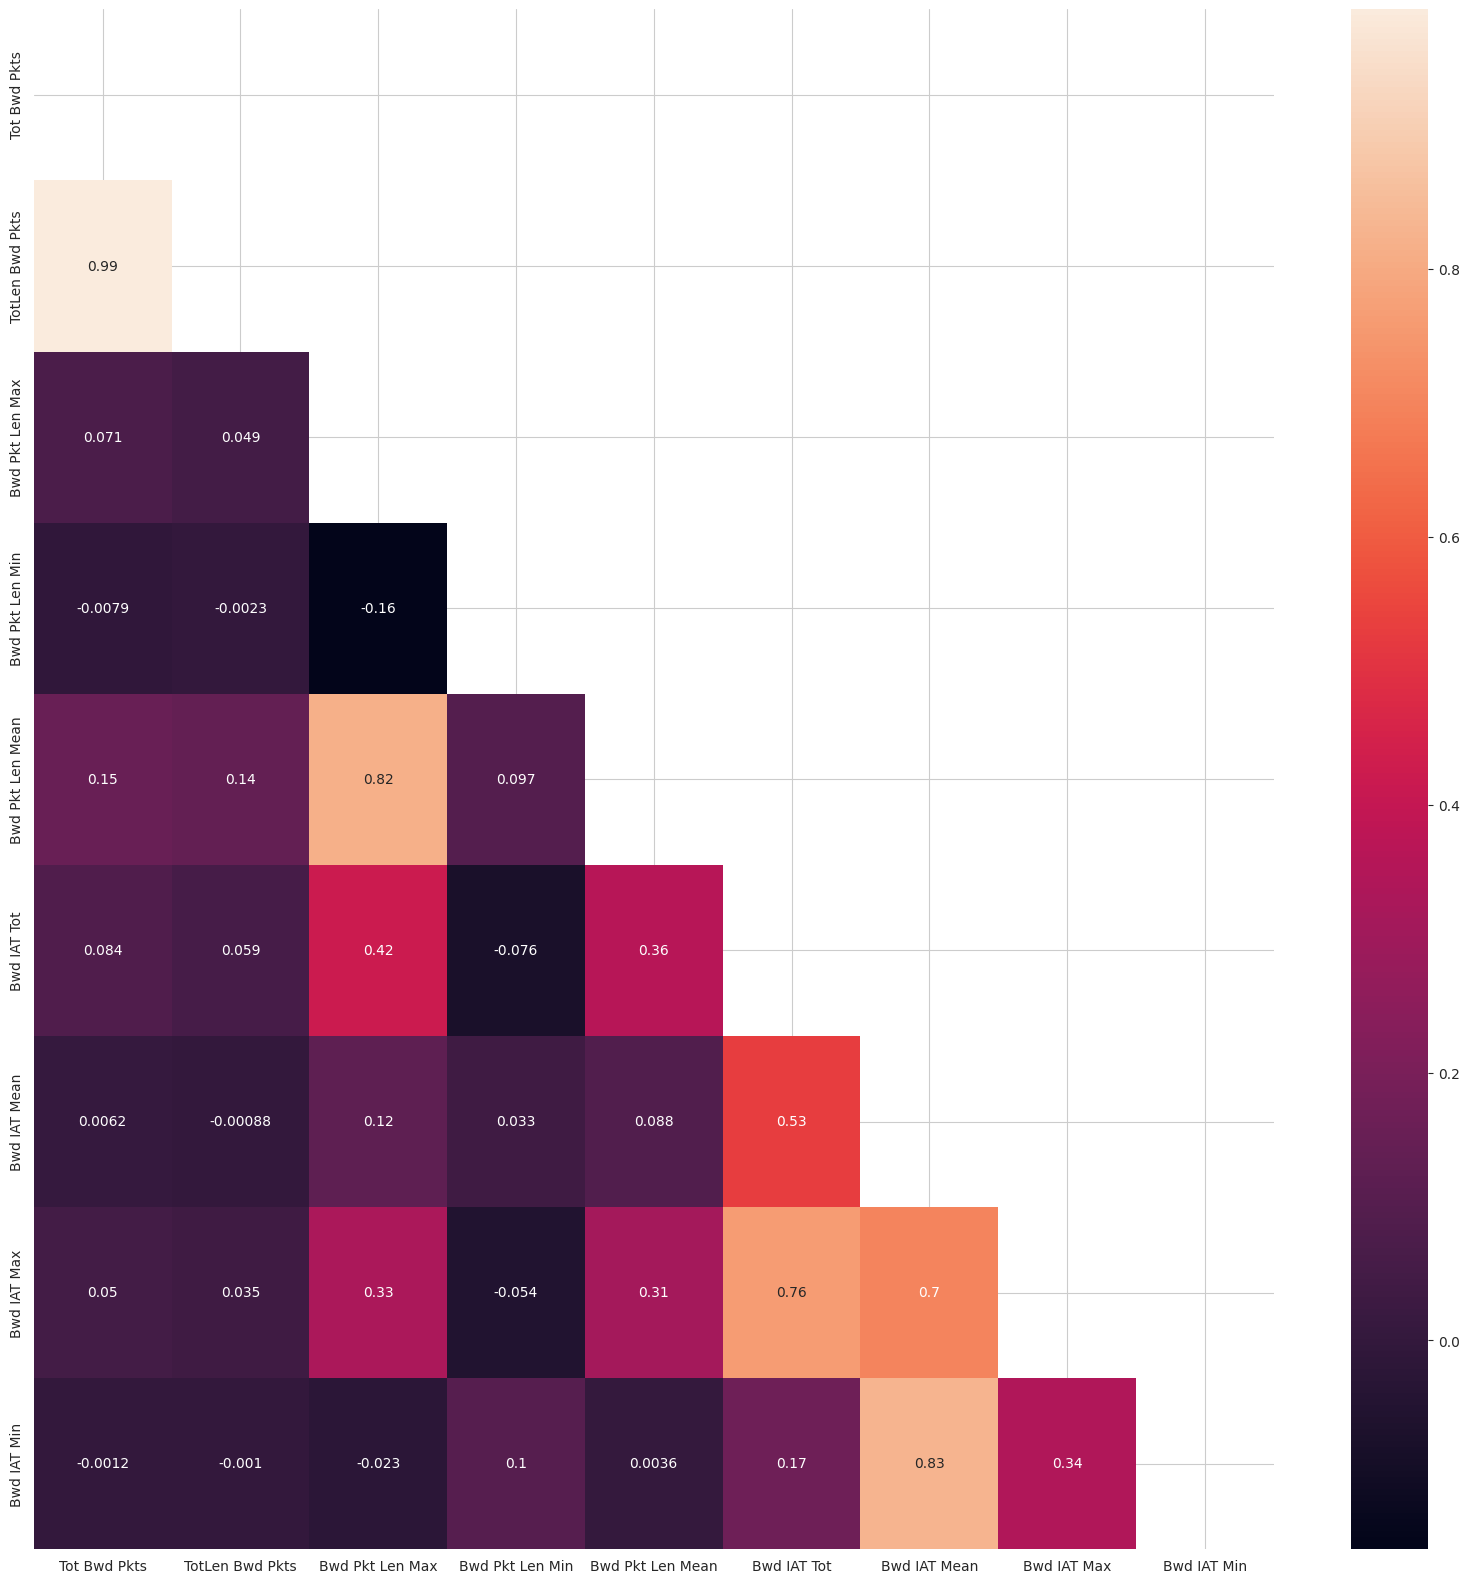

In [ ]:
corr = df[bwd_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True, mask=mask)

In [ ]:
correlatedFeatures = correlatedFeatures | getCorrelatedFeatures(corr)
correlatedFeatures

TotLen Bwd Pkts 0.9941316635660596


{'Fwd IAT Min', 'Fwd Pkt Len Mean', 'TotLen Bwd Pkts', 'TotLen Fwd Pkts'}

In [ ]:
df.drop(columns=correlatedFeatures, inplace=True)

In [ ]:
df.shape

(1279463, 32)

In [ ]:
num_cols = df.select_dtypes(exclude=['object']).columns
cols = [col for col in num_cols if 'Fwd' in col or 'Bwd' in col]

<Axes: >

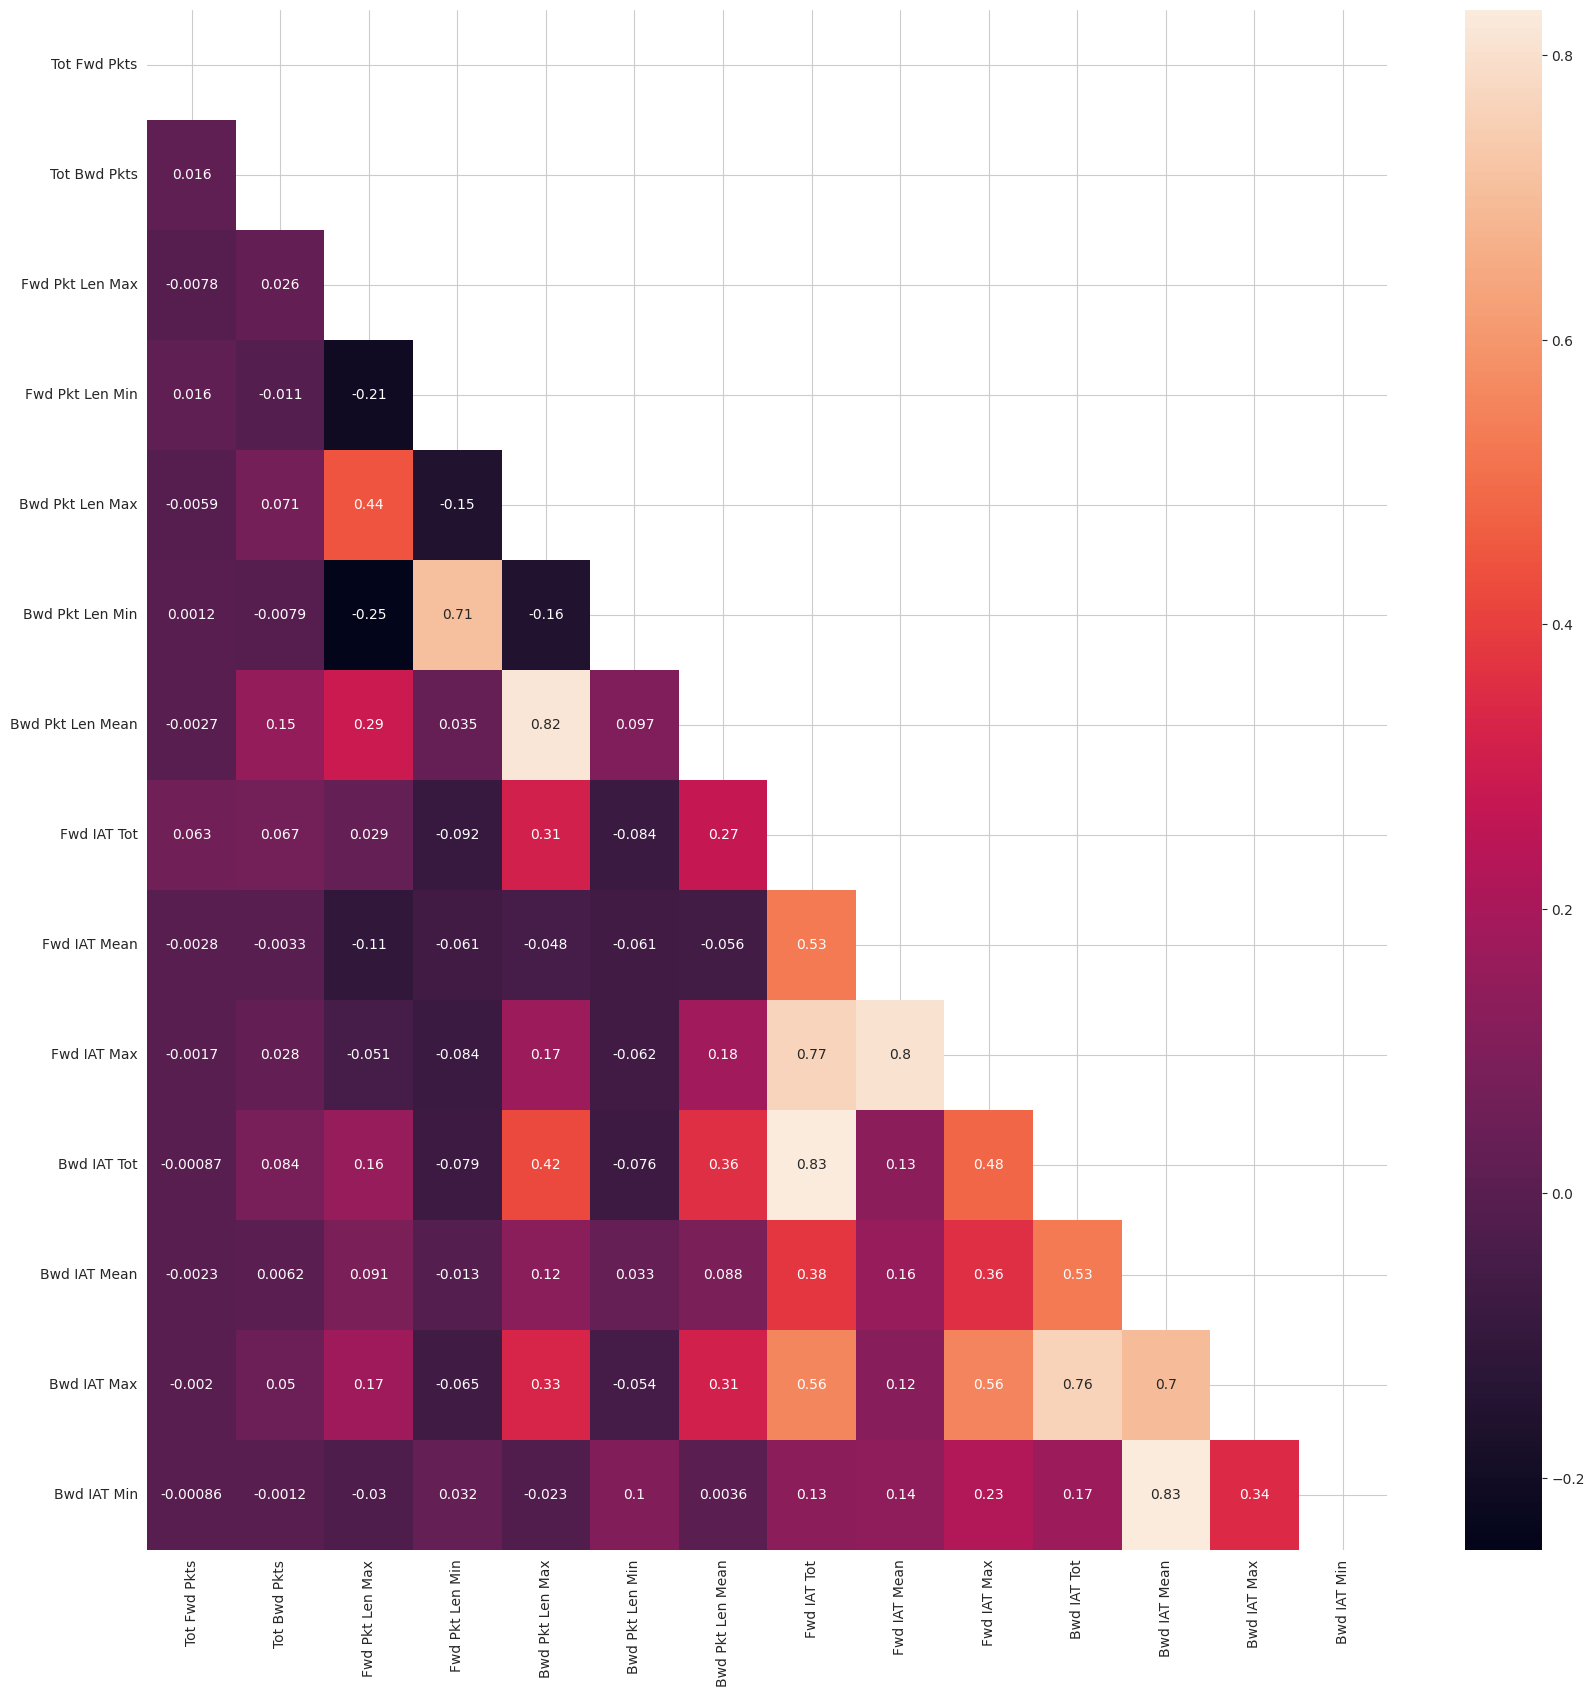

In [ ]:
corr = df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, mask=mask)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


#drop na values and reset index
data_clean = df.dropna().reset_index()
data_clean = data_clean.drop(columns=['index', 'Src Port', 'Dst Port', 'Protocol',"Flow ID",'Src IP', 'Dst IP'])
# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

,count
Label,
1,647297
0,632166


In [ ]:
data_clean.shape

(1279463, 26)

In [ ]:
data_clean.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'ACK Flag Cnt', 'Label'],
      dtype='object')

In [ ]:
new_cols = ['Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Max', 'Bwd IAT Min', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'Label']

In [ ]:
data_clean.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Max,...,Bwd IAT Max,Bwd IAT Min,Pkt Len Min,Pkt Len Max,Pkt Len Mean,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Label
0,5032233,3,5,603.0,0.0,972.0,0.0,194.400000,7.188904e+05,5004303.0,...,5004614.0,6.0,0.0,972.0,175.000000,0,1,0,0,1
1,10993127,3,5,408.0,0.0,972.0,0.0,194.400000,1.570447e+06,5990709.0,...,5990709.0,3.0,0.0,972.0,153.333333,0,1,0,0,1
2,479425,3,7,142.0,0.0,1460.0,0.0,671.714286,5.326944e+04,232452.0,...,232857.0,227.0,0.0,1460.0,440.363636,0,1,0,0,1
3,9042123,1,1,0.0,0.0,0.0,0.0,0.000000,9.042123e+06,9042123.0,...,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,1
4,1907579,1,1,0.0,0.0,0.0,0.0,0.000000,1.907579e+06,1907579.0,...,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,1


In [ ]:
data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

#del df

X = data_np[:, 0:25]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,25:]).toarray()

print("X" , np.shape(X))
print("Y" , np.shape(Y))

X (1279463, 25)
Y (1279463, 2)


In [ ]:
print(X)
print(Y)

[[5.0322330e+06 3.0000000e+00 5.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0993127e+07 3.0000000e+00 5.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.7942500e+05 3.0000000e+00 7.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [9.5353000e+04 6.0000000e+00 7.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [5.9150780e+06 8.0000000e+00 6.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.1381695e+07 1.2000000e+01 7.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(959597, 25)
(959597, 2)
(319866, 25)
(319866, 2)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the model
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # two hidden layers: 64 and 32 neurons
    activation='relu',            # ReLU activation (common for MLPs)
    solver='adam',                # Adam optimizer
    max_iter=200,                 # number of training epochs
    random_state=42
)

# Train (fit) the model
mlp.fit(X_train, Y_train)

# Predict on test set
Y_pred = mlp.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.9754365890716737

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    157931
           1       0.96      1.00      0.98    161935

   micro avg       0.98      0.98      0.98    319866
   macro avg       0.98      0.98      0.98    319866
weighted avg       0.98      0.98      0.98    319866
 samples avg       0.98      0.98      0.98    319866



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


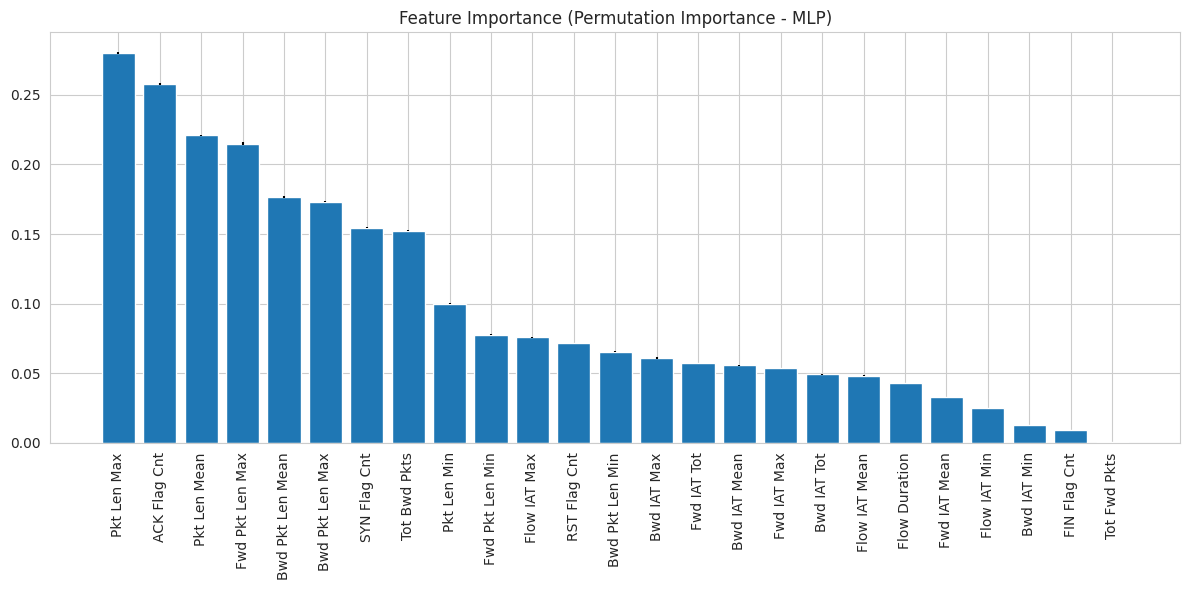

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute permutation importance
r = permutation_importance(mlp, X_test, Y_test, n_repeats=10, random_state=42)

# Map importance scores back to feature names
feature_names = new_cols[:-1]  # all except 'Label'
importances = r.importances_mean
std = r.importances_std

# Sort features by importance
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance (Permutation Importance - MLP)")
plt.tight_layout()
plt.show()
